In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset)
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [6]:
independent=dataset[['age', 'bmi', 'children','sex_female', 'sex_male','smoker_no', 'smoker_yes']]
independent

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [7]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [120]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='log2')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_features='log2',
                      splitter='random')

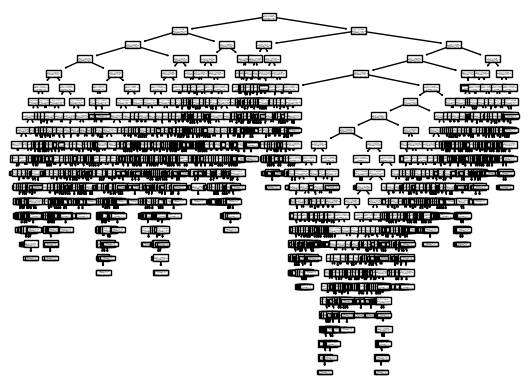

In [121]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [122]:
y_predict=regressor.predict(x_test)

In [123]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
r2_score

0.6386810084502847